# Combining Datasets

Some of the most interesting studies of data come from combining different data sources.

Operations for combination involve:

- concatenation
- joins
- merges

Pandas facilitates this form of fast data wrangling

In [1]:
import pandas as pd
import numpy as np

In [4]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    print(data)
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

{'A': ['A0', 'A1', 'A2'], 'B': ['B0', 'B1', 'B2'], 'C': ['C0', 'C1', 'C2']}


,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [12]:
# review
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)

    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Concatenation with `pd.concat`

How did we do this with NumPy?

In [6]:
import numpy as np
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, z, y])

array([1, 2, 3, 7, 8, 9, 4, 5, 6])

In [9]:
import pandas as pd
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
print(ser1)
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
dtype: object


1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [10]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

{'A': ['A1', 'A2'], 'B': ['B1', 'B2']}
{'A': ['A3', 'A4'], 'B': ['B3', 'B4']}


,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [13]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
#df4 = make_df('AB', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis=0)")

{'A': ['A0', 'A1'], 'B': ['B0', 'B1']}
{'C': ['C0', 'C1'], 'D': ['D0', 'D1']}


df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis=0)
     A    B    C    D
0   A0   B0  NaN  NaN
1   A1   B1  NaN  NaN
0  NaN  NaN   C0   D0
1  NaN  NaN   C1   D1

## Duplicate indices

One important difference between `np.concatenate` and `pd.concat` is that Pandas concatenation preserves indices, even if the result will have duplicate indices!



In [14]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

{'A': ['A0', 'A1'], 'B': ['B0', 'B1']}
{'A': ['A2', 'A3'], 'B': ['B2', 'B3']}


,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


Notice the repeated indices in the result. While this is valid within DataFrames, the outcome is often undesirable. `pd.concat()` gives us a few ways to handle it.

1. Catching the repeats as an error:

In [16]:
try:
    pd.concat?
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


2. Ignoring the index

In [17]:
# IMPORTANT
pd.concat?
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


3. Adding MultiIndex keys

In [18]:
display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], keys=['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

In [19]:
pd.concat([x, y], keys=['x', 'y']).unstack()

A       B    
    0   1   0   1
x  A0  A1  B0  B1
y  A2  A3  B2  B3

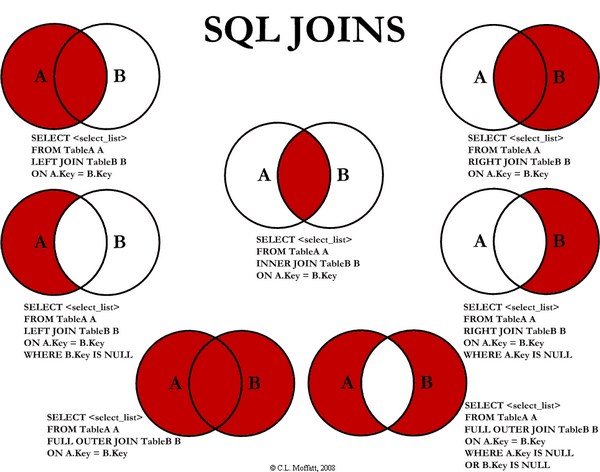

## Concatenation with joins

We've primarily looked at concatenation where columns are shared.

When combining datasets, chances are there will be different sets of column names.

`pd.concat` can handle this too via joins:

In [21]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

{'A': ['A1', 'A2'], 'B': ['B1', 'B2'], 'C': ['C1', 'C2']}
{'B': ['B3', 'B4'], 'C': ['C3', 'C4'], 'D': ['D3', 'D4']}


df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

By default, the join is a union of the input columns `(join='outer')`, but we can change this to an intersection of the columns using `join='inner'`:

In [25]:
display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

# Merging

`pd.merge()` is a subset of *relational algebra*

Rules for manipulating relational data and foundation of most database operations

- One-to-one joins
- Many-to-one joins
- Many-to-many joins
- Merging on a specific key

## One-to-one joins

Perhaps the simplest type of merge expresion is the one-to-one join,

Similar to the column-wise concatenation

In [26]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [27]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


The `pd.merge()` function recognizes that each `DataFrame` has an "employee" column

Automatically joins using this column as a key

Doesn't maintain order and discards original index

# Many-to-one joins

Many-to-one joins are joins in which one of the two key columns contains duplicate entries.

In [28]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

## Many-to-many joins

Many-to-many joins are a bit confusing conceptually, but are nevertheless well defined.

If the key column in both the left and right array contains duplicates, then the result is a many-to-many merge.

In [ ]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


## Specification of the Merge Key


We've already seen the default behavior of `pd.merge()`: it looks for one or more matching column names between the two inputs, and uses this as the key.

However, often the column names will not match so nicely, and pd.merge() provides a variety of options for handling this.

## The `on` keyword

Most simply, you can explicitly specify the name of the key column using the `on` keyword, which takes a column name or a list of column names:

In [29]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

## Example: US States Data

Merge and join operations come up most often when combining data from different sources.

Next, we will consider an example of some data about US states and their populations.

In [30]:
# Following are shell commands to download the data
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57935  100 57935    0     0   464k      0 --:--:-- --:--:-- --:--:--  467k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   835  100   835    0     0   8335      0 --:--:-- --:--:-- --:--:--  8350
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   872  100   872    0     0   9451      0 --:--:-- --:--:-- --:--:--  9478


Let's take a look at the three datasets, using the Pandas `read_csv()` function:

In [31]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')

pop.head()
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

areas.head()
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

abbrevs.head()
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

In [32]:
pop.tail()

,state/region,ages,year,population
2539,USA,total,2010,309326295.0
2540,USA,under18,2011,73902222.0
2541,USA,total,2011,311582564.0
2542,USA,under18,2012,73708179.0
2543,USA,total,2012,313873685.0


from matplotlib import pyplot as plt
_df_0['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['population'].plot(kind='hist', bins=20, title='population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('ages').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='year', y='population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['population']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ages')):
  _plot_series(series, series_name, i)
  fig.legend(title='ages', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('population')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ages')):
  _plot_series(series, series_name, i)
  fig.legend(title='ages', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['population'].plot(kind='line', figsize=(8, 4), title='population')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['ages'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='year', y='ages', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['ages'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='population', y='ages', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Given this information, say we want to compute a relatively straightforward result: _rank US states and territories by their 2010 population density._

We'll start with a many-to-one merge that will give us the full state name within the population `DataFrame`. We want to merge based on the `state/region` column of `pop`, and the abbreviation column of `abbrevs`. We'll use `how='outer'` to make sure no data is thrown away due to mismatched labels.

In [35]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
print(merged)
merged = merged.drop(['abbreviation'], axis=1) # drop duplicate info
merged.head()

     state/region     ages  year   population    state abbreviation
0              AL  under18  2012    1117489.0  Alabama           AL
1              AL    total  2012    4817528.0  Alabama           AL
2              AL  under18  2010    1130966.0  Alabama           AL
3              AL    total  2010    4785570.0  Alabama           AL
4              AL  under18  2011    1125763.0  Alabama           AL
...           ...      ...   ...          ...      ...          ...
2539          USA    total  2010  309326295.0      NaN          NaN
2540          USA  under18  2011   73902222.0      NaN          NaN
2541          USA    total  2011  311582564.0      NaN          NaN
2542          USA  under18  2012   73708179.0      NaN          NaN
2543          USA    total  2012  313873685.0      NaN          NaN

[2544 rows x 6 columns]


,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


Let's double-check whether there were any mismatches here, which we can do by looking for rows with nulls:

In [36]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

Some of the population info is null; let's figure out which these are!

In [38]:
print(merged['population'])
merged[merged['population'].isnull()].head()

0         1117489.0
1         4817528.0
2         1130966.0
3         4785570.0
4         1125763.0
           ...     
2539    309326295.0
2540     73902222.0
2541    311582564.0
2542     73708179.0
2543    313873685.0
Name: population, Length: 2544, dtype: float64


,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


It appears that all the null population values are from Puerto Rico prior to the year 2000; this is likely due to this data not being available from the original source.

More importantly, we see also that some of the new `state` entries are also null, which means that there was no corresponding entry in the `abbrevs` key! Let's figure out which regions lack this match:

In [42]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

So, what is the issue?

Puerto Rico and USA do not appear in the state abbreviation key.

Let's fix this:

In [44]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
print(merged)
merged.isnull().any()

     state/region     ages  year   population          state
0              AL  under18  2012    1117489.0        Alabama
1              AL    total  2012    4817528.0        Alabama
2              AL  under18  2010    1130966.0        Alabama
3              AL    total  2010    4785570.0        Alabama
4              AL  under18  2011    1125763.0        Alabama
...           ...      ...   ...          ...            ...
2539          USA    total  2010  309326295.0  United States
2540          USA  under18  2011   73902222.0  United States
2541          USA    total  2011  311582564.0  United States
2542          USA  under18  2012   73708179.0  United States
2543          USA    total  2012  313873685.0  United States

[2544 rows x 5 columns]


state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [46]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,Puerto Rico
2449,PR,total,1990,NaN,Puerto Rico
2450,PR,total,1991,NaN,Puerto Rico
2451,PR,under18,1991,NaN,Puerto Rico
2452,PR,total,1993,NaN,Puerto Rico


No more nulls in the `state` column :)

Now we can merge the result with the area data using a similar procedure. Examining our results, we will want to join on the state column in both:



In [64]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


Let's check for nulls again:

In [65]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

There are nulls in the area column; we can take a look to see which regions were ignored here:

In [66]:
print(final.shape)
final['state'][final['area (sq. mi)'].isnull()].unique()

(2544, 6)


array(['United States'], dtype=object)

We see that our areas DataFrame does not contain the area of the United States as a whole. We could insert the appropriate value (using the sum of all state areas, for instance), but in this case we'll just drop the null values because the population density of the entire United States is not relevant to our current discussion:

In [68]:
# important .dropna
print(final.shape)
final.dropna(inplace=True)
print(final.shape)
print(final.sample(5))
final.head()

(2476, 6)
(2476, 6)
     state/region     ages  year  population        state  area (sq. mi)
1386           NV  under18  1994    376745.0       Nevada       110567.0
2179           VT  under18  2000    147549.0      Vermont         9615.0
520            GA    total  1993   6978240.0      Georgia        59441.0
2418           WY    total  2003    503453.0      Wyoming        97818.0
332            CT  under18  1992    777264.0  Connecticut         5544.0


,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


Data is now in a good shape.

So, let's answer that original question...

(What is the ranking of US states and regions by their 2010 population densities?)

We'll use the `query()` function to do this quickly (this requires the numexpr package to be installed)

In [72]:
final.dtypes

state/region      object
ages              object
year               int64
population       float64
state             object
area (sq. mi)    float64
dtype: object

In [82]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010 = data2010.drop(["ages", "year"], axis=1)
data2010.head()

,state/region,population,state,area (sq. mi)
3,AL,4785570.0,Alabama,52423.0
91,AK,713868.0,Alaska,656425.0
101,AZ,6408790.0,Arizona,114006.0
189,AR,2922280.0,Arkansas,53182.0
197,CA,37333601.0,California,163707.0


In [83]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [84]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

 We can see that by far the densest region in this dataset is Washington, DC (i.e., the District of Columbia); among states, the densest is New Jersey.

In [85]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

In [86]:
data2010["density"] = density
data2010

,state/region,population,area (sq. mi),density
state,,,,
Alabama,AL,4785570.0,52423.0,91.287603
Alaska,AK,713868.0,656425.0,1.087509
Arizona,AZ,6408790.0,114006.0,56.214497
Arkansas,AR,2922280.0,53182.0,54.948667
California,CA,37333601.0,163707.0,228.051342
Colorado,CO,5048196.0,104100.0,48.493718
Connecticut,CT,3579210.0,5544.0,645.600649
Delaware,DE,899711.0,1954.0,460.445752
District of Columbia,DC,605125.0,68.0,8898.897059


We see that the least dense state, by far, is Alaska, averaging slightly over one resident per square mile.

This type of messy data merging is a common task when trying to answer questions using real-world data sources.


# Summary

We've looked at the fundamentals of:

- concatenating
- joining
- merging

data using Pandas

In [ ]:
# Advanced task, try the above, but with English County data

!curl -O https://raw.githubusercontent.com/psmith-uob/data-EnglandCounties/main/county-areas.csv
!curl -O https://raw.githubusercontent.com/psmith-uob/data-EnglandCounties/main/county-populations.csv